Import the following librairies and modules

- `pickle`
- `warnings`
- `numpy` as `np`
- `pandas` as `pd`
- `matplotlib.pyplot` as `plt`
- from `sklearn.linear_model` import `LinearRegression`
- from `sklearn.tree` import `DecisionTreeRegressor`
- from `sklearn.ensemble` import `RandomForestRegressor`, `AdaBoostRegressor`, `BaggingRegressor`, `GradientBoostingRegressor`
- from `sklearn.model_selection` import `cross_val_score` and `train_test_split`
- from `sklearn.metrics` import `r2_score` and `mean_absolute_percentage_error`


In [22]:
import pickle
import warnings 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import r2_score, mean_absolute_percentage_error
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,BaggingRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from tqdm import tqdm

In [23]:
# To suppress the warnings in the notebook
warnings.filterwarnings("ignore")

##### Step 0:

- read the csv file `pgm_consumption.csv` and store in the variable `df`
- set `header=0`.
- display the first 5 rows.

In [24]:
df=pd.read_csv('../data/pgm_consumption.csv', header=0)
df.head(5)

,datetime,consumption
0,2004-12-31 01:00:00,13478.0
1,2004-12-31 02:00:00,12865.0
2,2004-12-31 03:00:00,12577.0
3,2004-12-31 04:00:00,12517.0
4,2004-12-31 05:00:00,12670.0


We need to treat the `datetime` column to set it as index. Simply execute the cell.

In [25]:
df["datetime"] = pd.to_datetime(df["datetime"], format="%Y-%m-%d %H:%M:%S")
df = df.set_index("datetime")
df = df.sort_index()
df.head()

,consumption
datetime,
2004-10-01 01:00:00,12379.0
2004-10-01 02:00:00,11935.0
2004-10-01 03:00:00,11692.0
2004-10-01 04:00:00,11597.0
2004-10-01 05:00:00,11681.0


In [26]:
df.tail()

,consumption
datetime,
2018-08-02 20:00:00,17673.0
2018-08-02 21:00:00,17303.0
2018-08-02 22:00:00,17001.0
2018-08-02 23:00:00,15964.0
2018-08-03 00:00:00,14809.0


##### Step 1:
- Check the data health.
    - Are there any missing values? See [hint](https://stackoverflow.com/questions/26266362/how-do-i-count-the-nan-values-in-a-column-in-pandas-dataframe)
    - There are no outliers, so we donot have to check for outliers.

In [27]:
df.isna().sum()

consumption    0
dtype: int64

- Plot the first week of the dataframe. See [Pandas Dataframe head](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html)
- By looking at the graph what do you observe in terms of pattern (seasonility) in the graph? Write in a markdown below

<Axes: xlabel='datetime'>

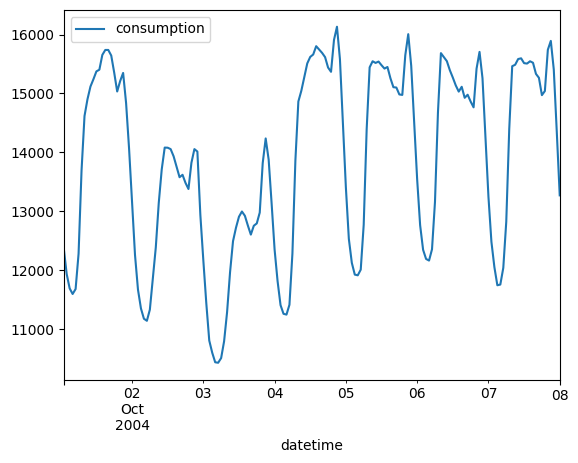

In [28]:
df.head(24*7).plot()

<Axes: xlabel='datetime'>

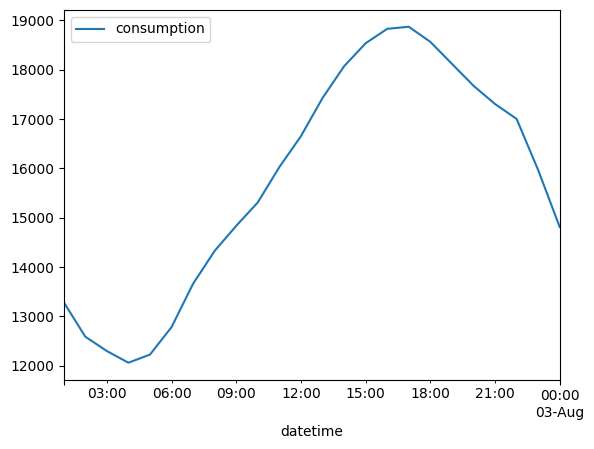

In [29]:
df.tail(24).plot()

##### Step 2:

- We need to transform this univariate dataset into multivariate dataset.
- If you donot understand what is happening in the following cell, please raise a question.

In [30]:
number_of_hours_in_a_day = 24

list_shifting_days = [1, 7, 365]

for shifting_days in list_shifting_days:
    df[f"consumption_{shifting_days}_day"] = df["consumption"].shift(number_of_hours_in_a_day * shifting_days)

df = df.dropna()

In [31]:
df.head()

,consumption,consumption_1_day,consumption_7_day,consumption_365_day
datetime,,,,
2005-10-01 03:00:00,10931.0,11577.0,12073.0,12379.0
2005-10-01 04:00:00,10773.0,11418.0,11762.0,11935.0
2005-10-01 05:00:00,10862.0,11556.0,11677.0,11692.0
2005-10-01 06:00:00,11006.0,12302.0,11810.0,11597.0
2005-10-01 07:00:00,11563.0,13849.0,12236.0,11681.0


##### Step 3:

- Split the data into input variables `X` and target variable `y`.
- Here we would like to predict the `consumption` based on the generated columns.

In [32]:
X=df.drop(["consumption"], axis=1)
y=df.filter(items=["consumption"])
y.columns,X.columns

(Index(['consumption'], dtype='object'),
 Index(['consumption_1_day', 'consumption_7_day', 'consumption_365_day'], dtype='object'))

In [33]:
dict_regressors = {"DecisionTreeRegressor":DecisionTreeRegressor(),
                   "RandomForestRegressor":RandomForestRegressor(),
                   "AdaBoostRegressor":AdaBoostRegressor(),
                   "BaggingRegressor":BaggingRegressor(),
                   "GradientBoostingRegressor":GradientBoostingRegressor(),
                   "LinearRegressor":LinearRegression()}

Before moving forward, let us select the algorithm which relatively gives us the best model. We can do it using `cross_val_score`.

- Iterate over the dictionary `dict_regressors` to calculate `cross_val_score`. See[Scikit-Learn cross_val_score](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)
    - Keep `cv=5` in the input/argument of `cross_val_score`. It means that you are splitting your dataset into 5 chunks, and cross_val iterates over all of them by keeping one chunk as test subset and the other 4 as train subset. Store the result of `cross_val_score` in a variable `score`.
    - Display the average score, rounded up to 2 decimal points, side by side to the key of `dict_regressors`. See [Python Round](https://www.w3schools.com/python/ref_func_round.asp) and [Numpy mean](https://numpy.org/doc/stable/reference/generated/numpy.mean.html)

In [34]:
for regressor_name,regressor in tqdm(dict_regressors.items(), desc="Computing scores"):
    score=cross_val_score(regressor, X, y, cv=5)
    print(regressor_name, np.mean(score))



Computing scores:  17%|█▋        | 1/6 [00:09<00:45,  9.11s/it]

DecisionTreeRegressor 0.5786712394201597


Computing scores:  33%|███▎      | 2/6 [22:34<53:00, 795.16s/it]

RandomForestRegressor 0.7727722527160733


Computing scores:  50%|█████     | 3/6 [23:05<22:19, 446.42s/it]

AdaBoostRegressor 0.7396584238888686


Computing scores:  67%|██████▋   | 4/6 [25:47<11:08, 334.08s/it]

BaggingRegressor 0.7552055410762973


Computing scores:  83%|████████▎ | 5/6 [28:50<04:39, 279.46s/it]

GradientBoostingRegressor 0.7954491200262603


Computing scores: 100%|██████████| 6/6 [28:50<00:00, 288.45s/it]

LinearRegressor 0.792353643958027


Choose the regressor you seem better suited for this problem. Justify it in a markdown below

##### Step 4:

We need to split the whole dataset into training subset and test subset. 
- To do so, look at the [train_test_split documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) and figure out how to use the method `train_test_split` to split the dataset into subsets. 
- Keep `test_size=0.20` as an input/argument to `train_test_split` method. It means that we are keeping 20% of data for test and rest for training.
- Keep `random_state=8` as an input/argument to `train_test_split` method.
- Your output variable should be `X_train`, `X_test`, `y_train`, `y_test`

In [35]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=8)


##### Step 5:

- Call the model of your chosen regressor and store in a variable `model`.
- Fit the seen data i.e. `X_train` and `y_train` in it. 

See the official documentation of your chosen regressor. to find it, type it in google `scikit-learn <your_chosen_regressor>`

In [36]:
model=GradientBoostingRegressor()
model.fit(X_train, y_train)

GradientBoostingRegressor()

##### Step 6:

To verify if the model works fine on training data (also known as seen data), we need to first predict using `X_train`.
- Save the result in a variable `y_predict_train`

In [37]:
y_predict_train=model.predict(X_train)
y_predict_train

array([17011.59423908, 18010.88556677, 17673.88526179, ...,
       16890.03767978, 12828.40133733, 11636.69023051])

##### Step 7:

- The result `y_predict_train` should be compared with the measured values `y_train` to calculate the error (or score) using an indicator.
- Coefficient of determination also called as R2 score is used to evaluate the performance of a linear regression model. It is the amount of the variation in the output dependent attribute which is predictable from the input independent variable(s). A good R2 score is close to 1, a bad R2 score is close to 0

You have to measure the r2_score. See [Scikit-Learn r2_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html). 
- Remember that `y_true=y_train` and `y_pred=y_predict_train` as input/argument to `r2_score` method.
- You should store the result in a variable `r2_train`

In [38]:
r2_train=r2_score(y_true=y_train, y_pred=y_predict_train)
r2_train

0.8116703345770836

Similarly, you have to measure the `mean_absoulute_percentage_error`. See [Scikit-Learn mean_absolute_percentage_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_percentage_error.html)

- You should store the result in a variable `mape_train`

In [39]:
mape_train=mape_train=mean_absolute_percentage_error(y_true=y_train, y_pred=y_predict_train)
mape_train

0.055063227437826406

##### Step 8-a:

- predict on unseen data `X_test` subset using the `model` and save it as `y_predict_test`

In [40]:
y_predict_test=model.predict(X_test)

##### Step 8-b:

- calculate r2 score of `y_test` and `y_predict_test`
- You should store the result in a variable `r2_test`

In [41]:
r2_test=r2_score(y_test,y_predict_test)
r2_test

0.8058909210719274

- calculate mean absolute percentage error of `y_test` and `y_predict_test`
- You should store the result in a variable `mape_test`

In [42]:
mape_test=mean_absolute_percentage_error(y_true=y_test, y_pred=y_predict_test)
mape_test

0.05591714666722536

##### Step 9:

- Compare `r2_train` and `r2_test`, what do you think about model? Is it best, good, bad or worst? Write your answer in a markdown below.

- Compare `mape_train` and `mape_test`, what do you think about model? Is it best, good, bad or worst? Write your answer in a markdown below.

- Looking at both indicators and their comparison that you made just above, what is your conclusion about the model. Is it marketable? Write your answer in a markdown below.

Run the cell below to visualize the prediction v/s recorded values. What do you think about the superposition of `predicted_values` on `measured_values`? Write your answer in a markdown below.

<Axes: >

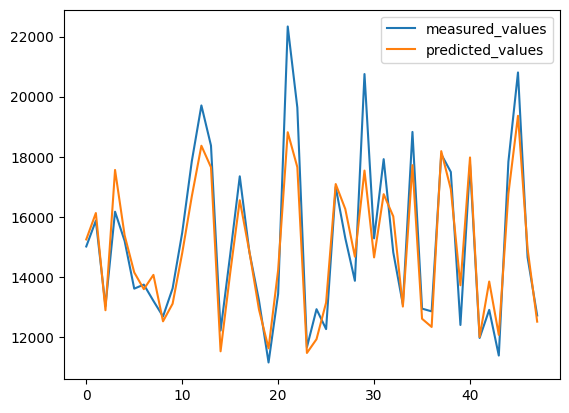

In [43]:
true_value = y_test.reset_index()
df_test=pd.DataFrame()
df_test['measured_values'] = true_value['consumption']
df_test['predicted_values']=y_predict_test
df_test.head(24*2).plot()

##### Step 10:

Save the model with filename `model_abc.pkl`, where `abc` should be replaced by your chosen regressor name. You can use it later.

In [44]:
with open('../models/model_GradientBoostingRegressor.pkl', 'wb') as f:
    pickle.dump(model, f)

##### Real World Use-Case:

Now that you have trained the model on `X_train` and tested internally yourself using `X_test`, let us test it on real-world use-case.

- read the csv file `pgm_consumption_rwi.csv` and store in the variable `X_rwi`
- set `header=0`.
- display the first 5 rows.

In [52]:
X_rwi=pd.read_csv('../data/real_world_implementation/pgm_consumption_rwi.csv', header=0,index_col=0)
X_rwi.head()

,datetime,consumption_1_day,consumption_7_day,consumption_365_day,consumption_366_day,consumption_372_day
0,2011-02-28 03:00:00,13670.0,13874.0,16392.0,17506.0,15524.0
1,2011-02-28 04:00:00,13640.0,13878.0,15703.0,16849.0,15021.0
2,2011-02-28 05:00:00,13716.0,14120.0,15218.0,16345.0,14835.0
3,2011-02-28 06:00:00,13815.0,14741.0,15110.0,16102.0,14735.0
4,2011-02-28 07:00:00,14195.0,15992.0,15159.0,16140.0,14728.0


In [53]:
X_rwi["datetime"] = pd.to_datetime(X_rwi["datetime"], format="%Y-%m-%d %H:%M:%S")
X_rwi = X_rwi.set_index("datetime")
X_rwi = X_rwi.sort_index()
X_rwi.head()

,consumption_1_day,consumption_7_day,consumption_365_day,consumption_366_day,consumption_372_day
datetime,,,,,
2011-02-28 03:00:00,13670.0,13874.0,16392.0,17506.0,15524.0
2011-02-28 04:00:00,13640.0,13878.0,15703.0,16849.0,15021.0
2011-02-28 05:00:00,13716.0,14120.0,15218.0,16345.0,14835.0
2011-02-28 06:00:00,13815.0,14741.0,15110.0,16102.0,14735.0
2011-02-28 07:00:00,14195.0,15992.0,15159.0,16140.0,14728.0


In [54]:
X_rwi= X_rwi[['consumption_1_day', 'consumption_7_day', 'consumption_365_day']]

Filter the data between **2012-07-09 00:00:00** and **2012-07-09 23:59:00**

In [55]:
X_rwi=X_rwi.loc["2012-07-09 00:00:00":"2012-07-09 23:59:00"]

- Check the data health.
    - Are there any missing values?

In [56]:
X_rwi.isna().sum()

consumption_1_day      0
consumption_7_day      0
consumption_365_day    0
dtype: int64

Load the saved model `model_abc.pkl` where `abc` should be replaced by your chosen regressor name and store it in variable `loaded_model`. 

In [57]:
loaded_model= pickle.load(open('../models/model_GradientBoostingRegressor.pkl', 'rb'))

Repeat step 8-a, however instead of `X_test`, you have to predict on `X_rwi` and store the results in a variable `y_predict_rwi`. also display `y_predict_rwi` or better visualize it using `matplotlib`

In [64]:
y_predict_rwi=loaded_model.predict(X_rwi)
y_predict_rwi

array([17539.32568023, 16328.56271553, 15406.74118928, 14315.23922701,
       13644.45779598, 13404.61679847, 13395.36144909, 13201.7635005 ,
       13717.52643011, 14782.7650966 , 16103.01049831, 17315.67654369,
       18183.52599834, 19174.95373231, 19577.92132392, 19923.34954616,
       20123.7648603 , 20141.23824175, 19926.64827302, 19452.4502869 ,
       18606.47149616, 18349.51262048, 18141.30537473, 17425.60596402])

In [62]:
X_rwi.index[-1]

Timestamp('2012-07-09 23:00:00')

<Axes: >

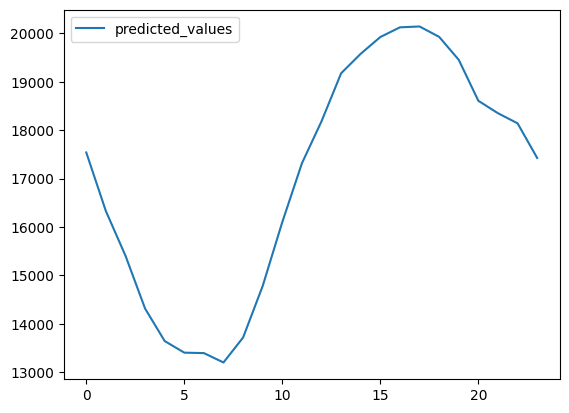

In [61]:
df_predict = pd.DataFrame(index=range(0,len(y_predict_rwi)))
df_predict["predicted_values"]=y_predict_rwi
df_predict.plot()


By doing so, you did day-ahead prediction for **2012-07-10** of energy consumption for the DSO (named PGM here). Congratulations! The exercise ends here.